<a href="https://colab.research.google.com/github/Kishan459/sms-spam-Classifier/blob/main/SMS_spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# checking null values
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

#### there are 3 features which contains more than 99% of null values, so we will simply drop these features

In [7]:
# droping last 3 features
df = df.iloc[:,0:2]

In [8]:
df.isnull().mean()*100

v1    0.0
v2    0.0
dtype: float64

In [9]:
df.sample(5)

,v1,v2
4243,ham,"Aight, I'm chillin in a friend's room so text ..."
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...
4910,ham,Love that holiday Monday feeling even if I hav...
134,spam,Want 2 get laid tonight? Want real Dogging loc...
846,ham,My stomach has been thru so much trauma I swea...


#### features name is not descriptive so we will change them

In [10]:
# changing feature name 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.sample(5)

,target,text
440,ham,Yes..he is really great..bhaji told kallis bes...
301,ham,"Shit that is really shocking and scary, cant i..."
2918,ham,Is xy in ur car when u picking me up?
3922,ham,Okay lor... Will they still let us go a not ah...
594,ham,I met you as a stranger and choose you as my f...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
# coverting ham and spam into 0 and 1
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
517,1,Your credits have been topped up for http://ww...
3463,0,My phone
362,0,Check audrey's status right now
1371,0,I though we shd go out n have some fun so bar ...
4823,0,Not thought bout it... || Drink in tap & spile...


In [15]:
# check for duplicated values
df.duplicated().sum()

403

In [16]:
# drop duplicate values
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
# value counts of target feature
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Text(0.5, 1.0, 'Target')

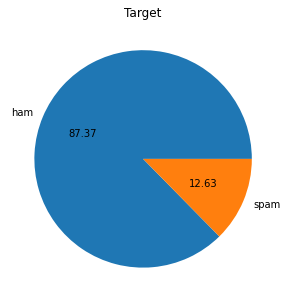

In [20]:
# visualising the value counts
plt.figure(figsize=(10,5))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f');
plt.title('Target')

#### from the above visualization we can say that data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# building a new features which contains no. of character by observations
df['num_character'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# building a new features which contains no. of words by observations
df['num_words'] =  df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# building a new features which contains no. of sentences by observations
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [30]:
# descriptive statistics for ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#descriptive statistics spam
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


#### above descrptive summary of both ham and spam we can see that mean chatacter, sentences and words of ham messages are approx half of spam messages, so we can say that spam messages are are bigger than ham messages.

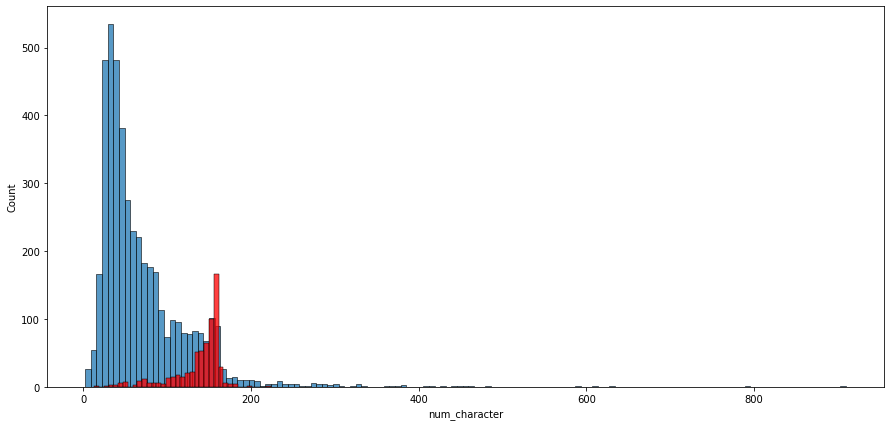

In [32]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_character']) 
sns.histplot(df[df['target']==1]['num_character'],color='red') 

#### in the above visualization we can seee that on avarge no. of characters in ham messages is less then of spam messages

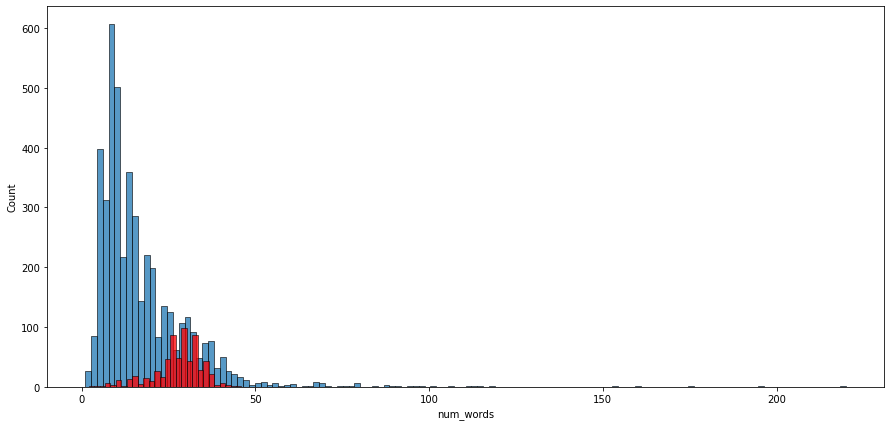

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_words']) 
sns.histplot(df[df['target']==1]['num_words'],color='red') 

#### in the above visualization we can seee that on avarge no. of words in ham messages is less then of spam messages

<Figure size 1080x504 with 0 Axes>

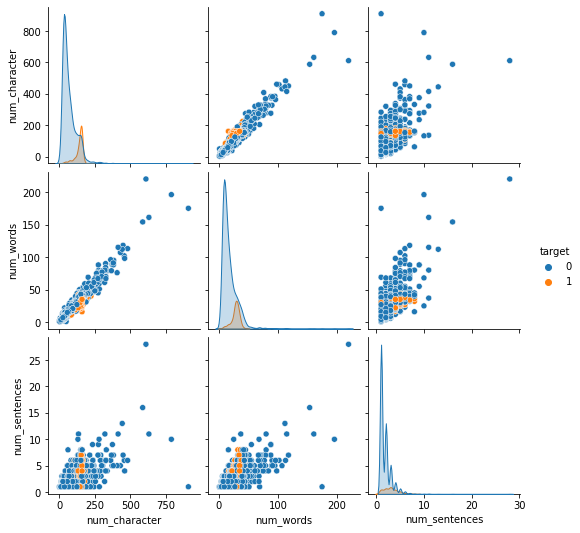

In [34]:
plt.figure(figsize=(15,7))
sns.pairplot(df,hue='target')

#### there are some outliers in data

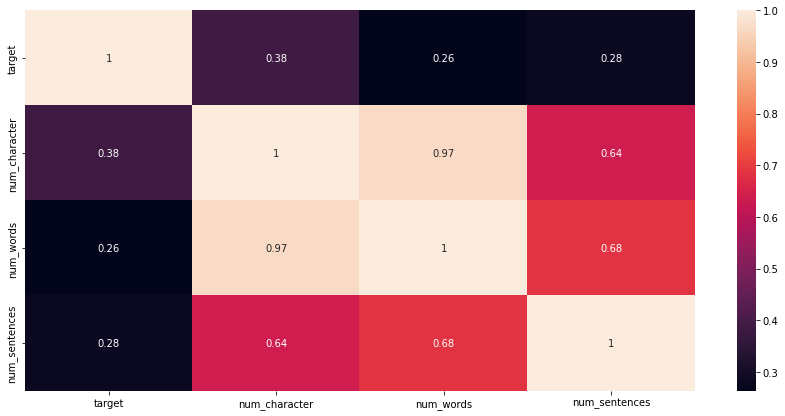

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

#### we can see that num_words is highly correlated with num_characters so, if num of words increses it will lead to increse in characters 
#### num_sentences is also highly correlated with num_words and num_characters 
#### so we can only keep one features, we will keep num_charaters because it is highly corrected with target feature than other features, so we can say that as number of character increses so do the chances of that message being spam

#Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stopwords and punctuation

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [39]:
# function for data preprocessing
def text_transform(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  x = []
  for i in text:
    if i.isalnum():
      x.append(i)

  text = x[:]
  x.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      x.append(i)

  text = x[:]
  x.clear()

  for i in text:
    x.append(ps.stem(i))
  return " ".join(x)

In [40]:
text_transform('I like reading books&, what about you?')

'like read book'

In [41]:
# builidng a new feature which contains text after data preprocessing
df['transformed_text'] = df['text'].apply(text_transform)

In [42]:
df.sample(5)

,target,text,num_character,num_words,num_sentences,transformed_text
3538,0,What happen dear. Why you silent. I am tensed,45,11,3,happen dear silent tens
3501,0,I will come to ur home now,26,7,1,come ur home
2688,0,Yes I know the cheesy songs from frosty the sn...,54,12,1,ye know cheesi song frosti snowman
3723,1,"Hi there, 2nights ur lucky night! Uve been inv...",156,28,4,hi 2night ur lucki night uve invit 2 xchat uk ...
4811,0,"fyi I'm at usf now, swing by the room whenever",46,12,1,fyi usf swing room whenev


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size = 10, background_color = 'white')

In [44]:
spam_word_c = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

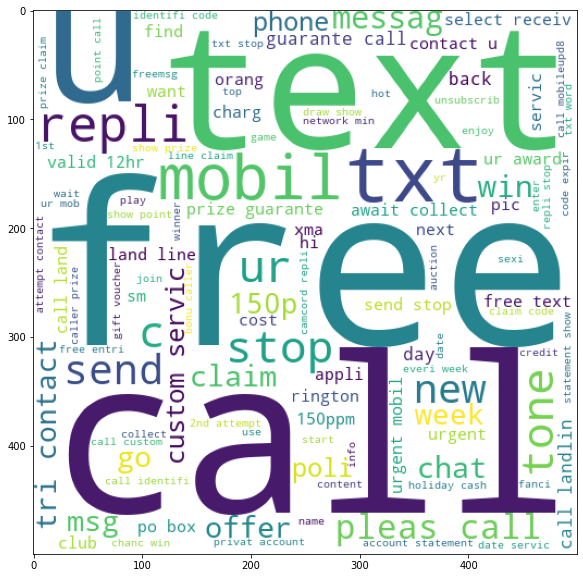

In [45]:
# visualizing wordcloud of spam messages 
plt.figure(figsize=(15,10))
plt.imshow(spam_word_c)

In [46]:
ham_word_c = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

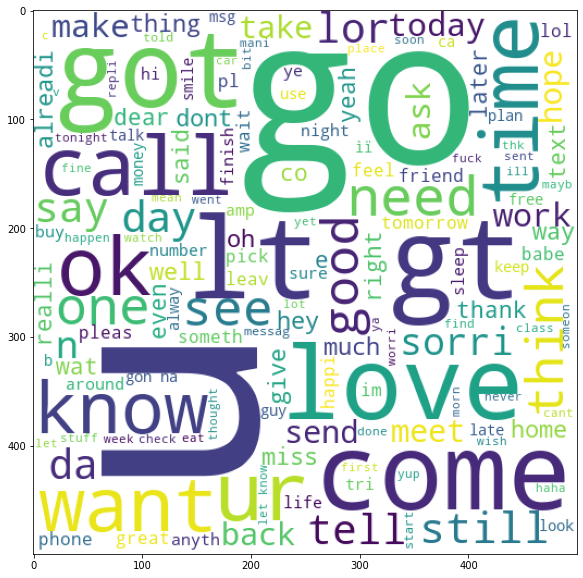

In [47]:
# visualizing wordcloud of ham messages
plt.figure(figsize=(15,10))
plt.imshow(ham_word_c)

In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [49]:
len(spam_corpus)

9939

In [50]:
from collections import Counter

### Top 30 spam words

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


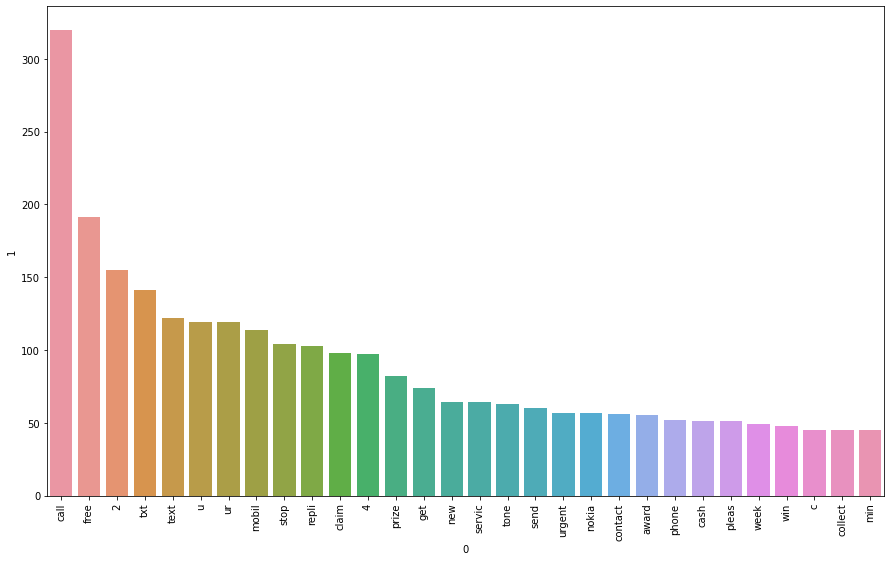

In [51]:
plt.figure(figsize=(15,9))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [53]:
len(ham_corpus)

35394

# Top 30 ham words

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


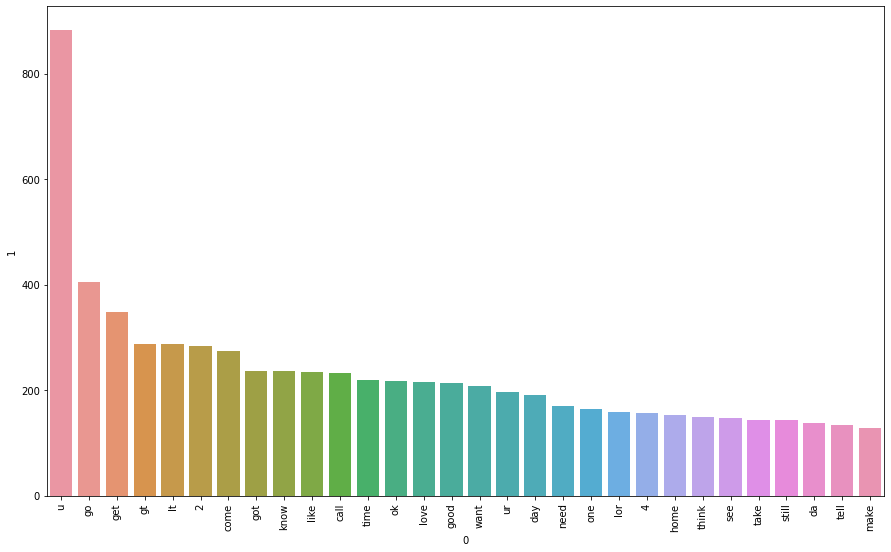

In [54]:
plt.figure(figsize=(15,9))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

#Model building